<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://vincentarelbundock.github.io/Rdatasets/datasets.html?

In [3]:
import pandas as pd

In [4]:
BFI_data = pd.read_csv('bfi.csv')
BFI_data

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


###Factor Analysis

###Assumptions:

ในข้อมูล multivariate ที่มีตัวแปร observ variable จำนวน n ตัว 

มีตัวแปร Factor (Latent Variables)  จำนวน k ตัว

ที่สามารถอธิบายข้อมูลทั้งหมดได้  โดย k < n


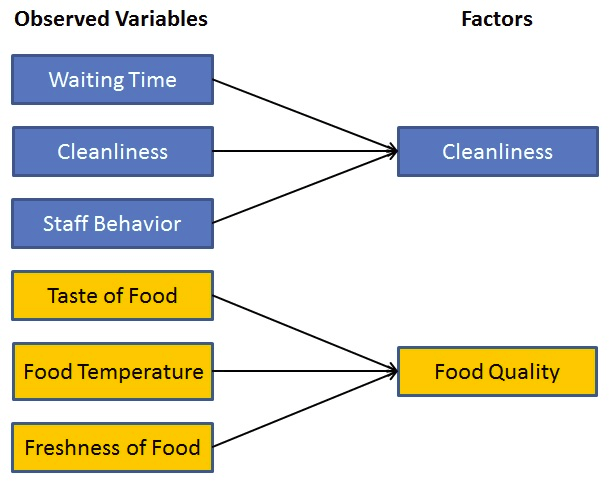

Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be ***perfect multicollinearity***.
* There should not be ***homoscedasticity*** between the variables.

เพื่อลดจำนวนตัวแปร หรือ dimensions ให้น้อยลง เพื่อจัดการกับข้อมูลได้ดีขึ้น  ตัวแปร Factor น้อยกว่าตัวแปร observeb

Assumption

outliers ทำให้ข้อมูลผิดพลาด

perfect ไม่ควรมี กราฟเป็นเส้นตรง ถ้ามีคือซ้ำต้องตัด data ออก

homo ไม่ควรมี   คือค่าความแปรปรวนคลาดเคลื่อน


##การทำ Factor analysis

In [5]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


ModuleNotFoundError: ignored

แก้ error ```ModuleNotFoundError: No module named 'factor_analyzer'``` โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

วิธี install package อื่นๆ

In [6]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 3.1MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=3d06f4acf8ad8b34cdbbfddd38ca2efa38d4ddf17a7dcb8079991620b7614bc9
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [7]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt # เหมือนกันกับ from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,d3,o4,o5 ด้วยคำสั่ง iloc

In [8]:
BFI_data_dropped= BFI_data.iloc[:,1:-3]#นับย้อนหลัง
BFI_data_dropped #  : เอาทุกแถว

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [9]:
 BFI_data_dropped = BFI_data_dropped.dropna()

In [10]:
BFI_data_dropped.shape

(2436, 25)

#Bartlett’s test

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #p-value = 0 ไม่มี perfect

chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO มีมากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่จะนำไปทำ Factor Analysis

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949221

The overall KMO for our data is 0.84(เหมาะสมที่จะนำไปทำ factor analysis), which is excellent. This value indicates that you can proceed with your planned factor analysis.

#Factor analysis

#import

In [13]:
from factor_analyzer import FactorAnalyzer

#Define

In [31]:
 fa= FactorAnalyzer(n_factors= 20) #กำหนดตัวแปรให้ factor มากๆไว้ก่อน

#Fit - Transform

In [29]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [16]:
data_fa.shape

(2436, 20)

#วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [19]:
ev,v = fa.get_eigenvalues()

#ใช้ eigen values

eigen values มากกว่า 1 แสดงว่าเราเลือกตัวนั้น

In [20]:
v.shape

(25,)

In [21]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

#screen plot

ค่าจะตัด eigenvalue ที่ 1 ตัวไหนเกิน 1แสดงว่า eigenvalue มากกว่า 1สามารถ ใช้งานได้

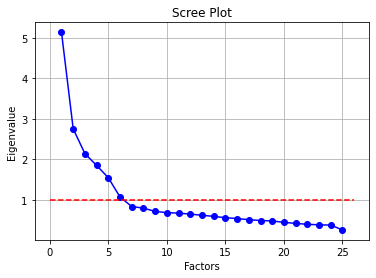

In [22]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

plot ตั้งแต่ factor ที่มีขนาดมากที่สุด ลดลงมาเรื่อยๆ

In [24]:
data_fa [:,:6]  #ดู6 ตัวแรก

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

##รัน Factor Analyzer  อีกรอบด้วย  parameters  จำนวน factor เท่ากับ 6

In [35]:
from factor_analyzer import FactorAnalyzer
fa2= FactorAnalyzer(n_factors= 6) #กำหนดตัวแปรให้ factor
data_fa2= fa2.fit_transform(BFI_data_dropped)

In [36]:
fa2.loadings_.shape

(25, 6)

#plot Factor loading

factor loading ไม่สนใจเครื่องหมาย สนใจแต่ค่าของตัวเลข

In [ ]:
from matplotlib import plt
import numpy as np
import matplotlib

#matrix plot

เอาไว้ดู confirm ว่าตัวแปรสัมพันธ์กัน จะเอาตัวแปรมาอยู่ใกล้ๆกัน

In [41]:
matplotlib.rcParans['figure.figsize']=[15,15]
plt.imshow[np.absolute[fa2.loadings_]

SyntaxError: ignored

ค่ามาก plot เป็นสีสว่าง   ค่าน้อย plot เป็นสีเข้ม (กราฟแรก)

การทำ Factor Analysis  มีประโยชน์ 2 อันคือ

1.

#กราฟแท่ง

In [ ]:
plt.bar(range(25))

height ความสูง  เอาแค่columns แรกมา